## TODO

- Las columnas con NaN no se pueden convertir a enteros, se pueden convertir a Int64Dtype() pero esto no lo acepta la maquina de LGBoost, ¿que hacer ahí? en los notebooks visto pasan primero la columna a string y después utilizan label encoder, lo que sería como inputar los NaN a una nueva variable

In [1]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import pandas as pd

import sys
sys.path.append('..')
from utils import plot_counts_and_proportion, read_train_transaction, get_categorical_from_df, preprocessing

In [2]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


def get_trues(Ser):
    return Ser[Ser].index

def encode_object_cols(object_cols, X_train, X_test=None ):
    les = []
    for col in object_cols:
        # Enconde variables
        le = LabelEncoder()
        le.fit(list(X_train[col].astype(str).values) + list(X_test[col].astype(str).values))
        X_train.loc[: ,col] = le.transform(list(X_train[col].astype(str).values))
        X_test.loc[: ,col] = le.transform(list(X_test[col].astype(str).values))
        
        # notnull = X.loc[:, col].notnull()
        # X.loc[notnull, col] = le.fit_transform(X.loc[notnull, col])
        
        # Change type
        # X.loc[:, col] = X[col].astype(pd.Int64Dtype()) # Permite NaNs
        les.append(le)
    return X_train, X_test, les

In [3]:
X, y = read_train_transaction(nrows = 5000,folder_path = '../../input/', undersampling = False, RandomState=10)

X

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991995,171600,30.00,S,16659,170.0,150.0,visa,226.0,credit,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2991996,171613,274.95,W,14318,321.0,150.0,visa,226.0,credit,274.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2991997,171629,47.95,W,1039,391.0,150.0,visa,166.0,debit,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
X, y = preprocessing(X, y, detect_outliers=False, convert_DT=False, create_features_props_over_cats = False, group_cat_prop=False,
                    is_nan_indicators=False)
X

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V335,V336,V337,V338,V339,P_email1,P_email2,R_email1,R_email2,LogTransactionAmt
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,86400.0,68.50,4,986,58.0,11,1,12,0,32,...,13.075,5.057812,13.0,19.5875,14.9375,13,0,7,0,4.226834
2987001,86401.0,29.00,4,133,198.0,11,2,1,0,34,...,13.075,5.057812,13.0,19.5875,14.9375,13,0,7,0,3.367296
2987002,86469.0,59.00,4,296,253.0,11,3,19,1,36,...,13.075,5.057812,13.0,19.5875,14.9375,25,0,7,0,4.077537
2987003,86499.0,50.00,4,1299,309.0,11,2,2,1,51,...,13.075,5.057812,13.0,19.5875,14.9375,35,0,7,0,3.912023
2987004,86506.0,50.00,1,279,270.0,11,2,1,0,42,...,0.000,0.000000,0.0,0.0000,0.0000,13,0,7,0,3.912023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991995,171600.0,30.00,3,1192,46.0,11,3,34,0,36,...,0.000,0.000000,0.0,0.0000,0.0000,13,0,7,0,3.401197
2991996,171613.0,274.95,4,1022,142.0,11,3,34,0,27,...,13.075,5.057812,13.0,19.5875,14.9375,35,0,7,0,5.616589
2991997,171629.0,47.95,4,1,191.0,11,3,19,1,34,...,13.075,5.057812,13.0,19.5875,14.9375,13,0,7,0,3.870159


In [5]:
for col in X:
    if col.endswith('isnan'):
        # Is just True or False
        if set(X[col].unique()) == set([True, False]):
            X[col] = X[col].astype('bool')
        else:
            print(f'La columna {col} tiene otros valores.')
            print('Estos valores son', set(X[col].unique()))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=get_categorical_from_df(X_train)[0])
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=get_categorical_from_df(X_train)[0])

#basic parameter:
parameters = {
    'application': 'binary',
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'boosting_type': 'gbdt',
    'boosting': 'gbdt',
    # 'categorical_feature': get_categorical_from_df(X_train)[0],
    'learning_rate': 0.05,
    'metric': 'auc',
    'min_data': 50,
    'max_depth': 10,
    'is_unbalance': 'true',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'objective': 'binary',
    'sub_feature': .5,
    'verbose': 0
}

In [8]:
clf = lgb.train(parameters,
               train_data,
               valid_sets=test_data,
               num_boost_round=5000,
               early_stopping_rounds=10000)

# clf = lgb.train(parameters, train_data, 100)

#Prediction
# y_pred = clf.predict(X_test)

/home/pablo-ubuntu/anaconda3/envs/lgbm/lib/python3.8/site-packages/lightgbm/basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[1]	valid_0's auc: 0.75918
Training until validation scores don't improve for 10000 rounds
[2]	valid_0's auc: 0.764016
[3]	valid_0's auc: 0.750806
[4]	valid_0's auc: 0.747596
[5]	valid_0's auc: 0.738962
[6]	valid_0's auc: 0.724577
[7]	valid_0's auc: 0.723948
[8]	valid_0's auc: 0.723074
[9]	valid_0's auc: 0.726052
[10]	valid_0's auc: 0.718648
[11]	valid_0's auc: 0.716448
[12]	valid_0's auc: 0.715697
[13]	valid_0's auc: 0.713538
[14]	valid_0's auc: 0.712773
[15]	valid_0's auc: 0.722732
[16]	valid_0's auc: 0.716967
[17]	valid_0's auc: 0.708443
[18]	valid_0's auc: 0.708497
[19]	valid_0's auc: 0.704645
[20]	valid_0's auc: 0.70153
[21]	valid_0's auc: 0.733142
[22]	valid_0's auc: 0.733484
[23]	valid_0's auc: 0.746407
[24]	valid_0's auc: 0.747322
[25]	valid_0's auc: 0.74877
[26]	valid_0's auc: 0.75653
[27]	valid_0's auc: 0.755929
[28]	valid_0's auc: 0.761667
[29]	valid_0's auc: 0.764945
[30]	valid_0's auc: 0.76929
[31]	valid_0's auc: 0.775355
[32]	valid_0's auc: 0.777896
[33]	valid_0's auc: 0.

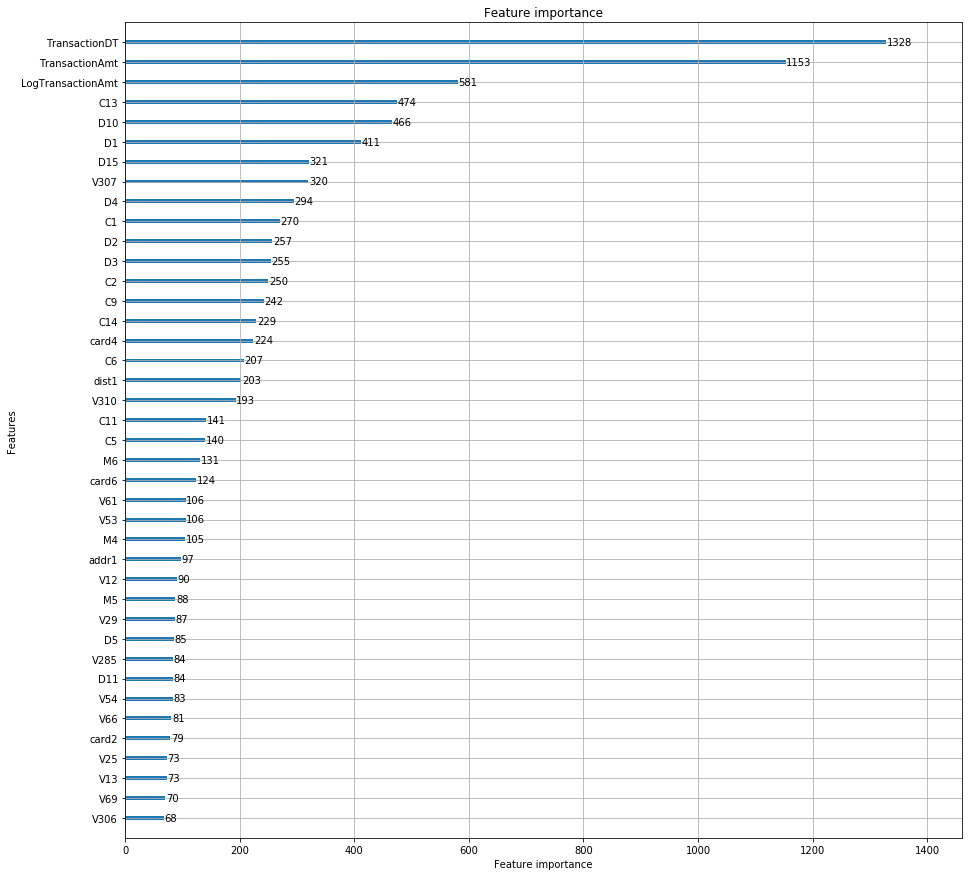

In [9]:
ax = lgb.plot_importance(clf, max_num_features=40, figsize=(15,15))
plt.show()

In [10]:
y_pred_proba = clf.predict(X_test)

In [24]:
help(clf.eval_train)

Help on method eval_train in module lightgbm.basic:

eval_train(feval=None) method of lightgbm.basic.Booster instance
    Evaluate for training data.
    
    Parameters
    ----------
    feval : callable or None, optional (default=None)
        Customized evaluation function.
        Should accept two parameters: preds, train_data,
        and return (eval_name, eval_result, is_higher_better) or list of such tuples.
    
            preds : list or numpy 1-D array
                The predicted values.
            train_data : Dataset
                The training dataset.
            eval_name : string
                The name of evaluation function (without whitespaces).
            eval_result : float
                The eval result.
            is_higher_better : bool
                Is eval result higher better, e.g. AUC is ``is_higher_better``.
    
        For multi-class task, the preds is group by class_id first, then group by row_id.
        If you want to get i-th row preds 

In [11]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
y_pred_bin = y_pred_proba > .5
cm = confusion_matrix(y_test, y_pred_bin)

In [12]:
cm

array([[1217,    3],
       [  20,   10]])

In [13]:
roc_auc_score(y_test, y_pred_proba)

0.8662295081967213

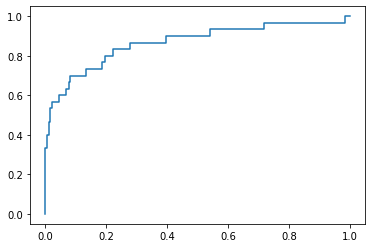

In [14]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr_rf, tpr_rf, label='RF')